In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)

In [ ]:
file="/Bengaluru_House_Data.csv"

In [ ]:
df=pd.read_csv(file)

# New Section

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
data=df.drop(['society','availability'],axis='columns')
data.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
for column in data.columns :
  print(data[column].value_counts())
  print("-"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
--------------------
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK    

In [ ]:
data.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

The records which have size as null are the Plot Area type properties which might not have any construction as of now. We will drop these records due to insufficient data.

In [ ]:
data.dropna(subset=['size'], inplace=True)

In [ ]:
data['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [ ]:
data.balcony = data.balcony.fillna(data.balcony.median())
data.bath = data.bath.fillna(data.bath.median())

In [ ]:
data.dropna(subset=['location'], inplace=True)

In [ ]:
data['balcony'].value_counts()

2.0    5705
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [ ]:
data.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [ ]:
data.shape

(13303, 7)

### Feature Engineering


In [ ]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))
data.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13303 non-null  object 
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  object 
 4   bath        13303 non-null  float64
 5   balcony     13303 non-null  float64
 6   price       13303 non-null  float64
 7   bhk         13303 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 935.4+ KB


In [ ]:
data = data.drop(['size'],axis=1)

In [ ]:
data.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
data[~data['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [ ]:
dt2 = data.copy()
dt2.total_sqft = dt2.total_sqft.apply(convert_sqft_to_num)
dt2 = dt2[dt2.total_sqft.notnull()]
dt2.head(2)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [ ]:
dt2.loc[122]

area_type     Super built-up  Area
location                    Hebbal
total_sqft                  5611.5
bath                           4.0
balcony                        0.0
price                        477.0
bhk                              4
Name: 122, dtype: object

In [ ]:
dt2.isnull().sum()

area_type     0
location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [ ]:
(3067 + 8156)/2


5611.5

In [ ]:
dt2.shape

(13257, 7)

In [ ]:
dt2.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [ ]:
dt2['total_sqft'].describe()

count    13257.000000
mean      1558.809175
std       1238.478935
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

### Feature Engineering

In [ ]:
dt3 = dt2.copy()
dt3['price_per_sqft'] = dt3['price']*100000/dt3['total_sqft']
dt3.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


Price is multiplied by 100000 for conversion as originally it is 39.07 lakhs

In [ ]:
dt3['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678298e+02
25%      4.271186e+03
50%      5.438596e+03
75%      7.313318e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

**Dimensionality Reduction**



In [ ]:
dt3.location = dt3.location.apply(lambda x: x.strip())
location_count = dt3['location'].value_counts(ascending=False)
location_count

Whitefield                   538
Sarjapur  Road               397
Electronic City              304
Kanakpura Road               271
Thanisandra                  236
                            ... 
Nagarbhavi  BDA Complex        1
Rajanna Layout                 1
1 Ramamurthy Nagar             1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [ ]:
location_count.values.sum()

13257

In [ ]:
len(location_count[location_count>10])

240

In [ ]:
len(location_count)

1287

In [ ]:
len(location_count[location_count<=10])

1047

In [ ]:
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

Sadashiva Nagar              10
BTM 1st Stage                10
Nagadevanahalli              10
Sector 1 HSR Layout          10
Basapura                     10
                             ..
Nagarbhavi  BDA Complex       1
Rajanna Layout                1
1 Ramamurthy Nagar            1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [ ]:
len(dt3.location.unique())

1287

In [ ]:
dt3.location = dt3.location.apply(lambda x: 'other' if x in location_count_less_than_10 else x)
len(dt3.location.unique())

241

In [ ]:
dt3['location'].value_counts(ascending=False)

other              2873
Whitefield          538
Sarjapur  Road      397
Electronic City     304
Kanakpura Road      271
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: location, Length: 241, dtype: int64

In [ ]:
dt3.head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,other,1020.0,6.0,2.0,370.00,6,36274.509804


**Removing outliers logically.**
Normally square ft per bedroom is 300. We will remove outliers by keeping our minimum thresold per bhk to be 300 sqft

In [ ]:
dt3.shape

(13257, 8)

In [ ]:
dt3[dt3.total_sqft/dt3.bhk<300].head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.000000


In [ ]:
dt4 = dt3[~(dt3.total_sqft/dt3.bhk<300)]
dt4.shape

(12513, 8)

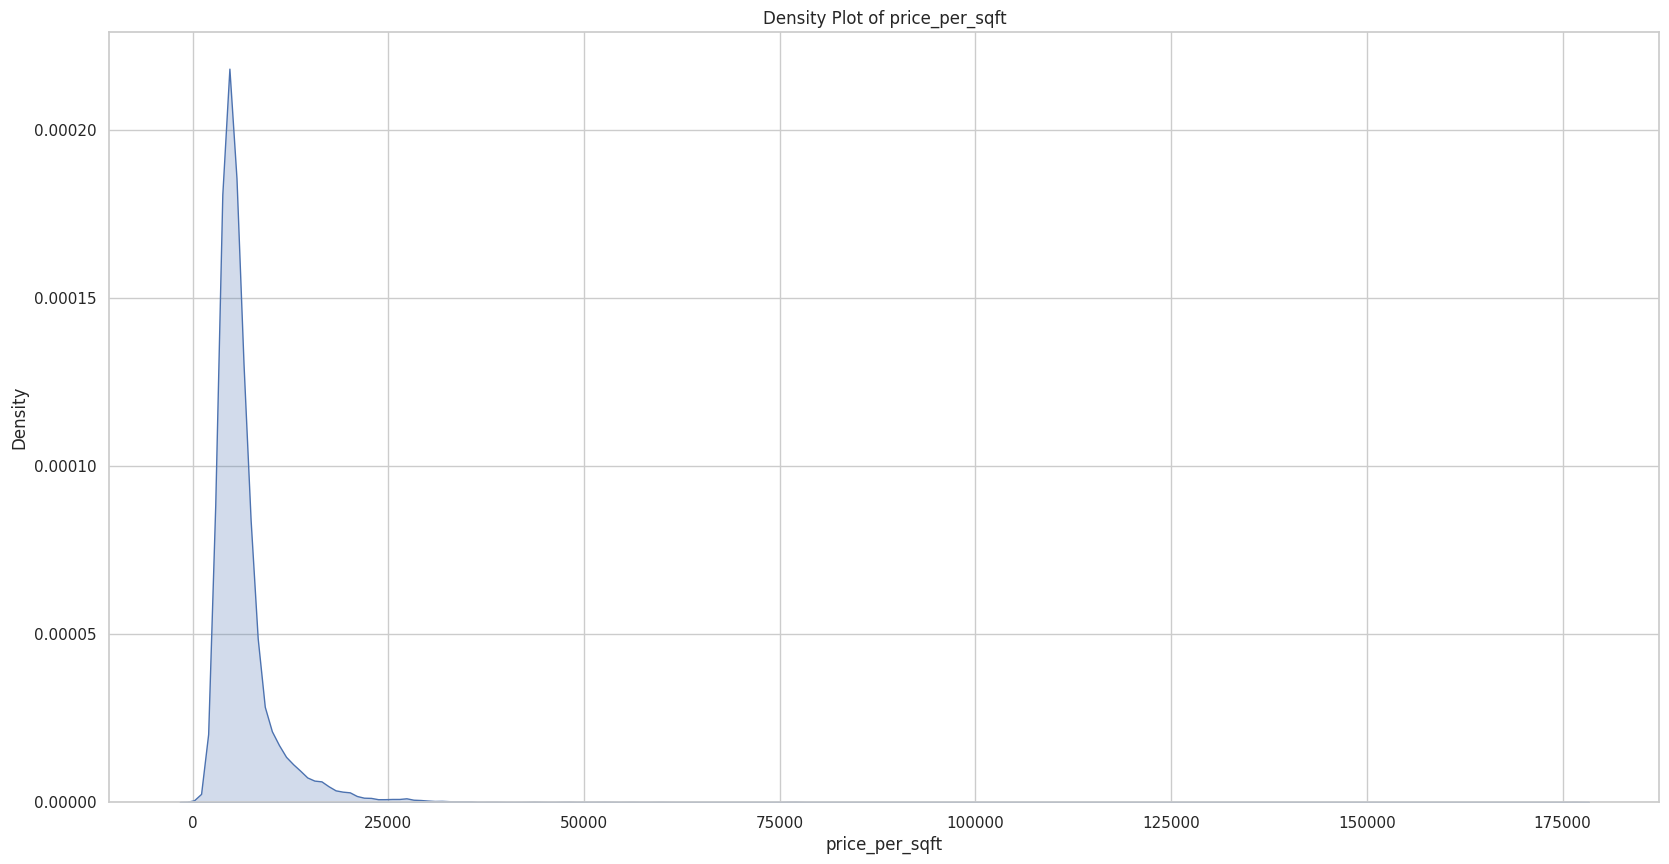

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_density_curve(dataframe, column_name):
    sns.set(style="whitegrid")  # Optional, for styling
    sns.kdeplot(dataframe[column_name], fill=True)
    plt.xlabel(column_name)
    plt.ylabel("Density")
    plt.title(f"Density Plot of {column_name}")
    plt.show()
plot_density_curve(dt4, 'price_per_sqft')

In [ ]:
dt4['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

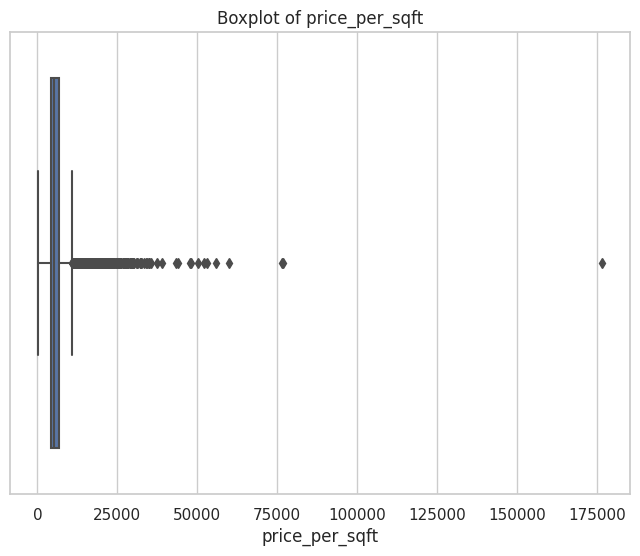

In [ ]:
def plot_boxplot(dataframe, column_name):
    sns.set(style="whitegrid")  # Optional, for styling
    plt.figure(figsize=(8, 6))  # Optional, set the figure size
    sns.boxplot(x=dataframe[column_name])
    plt.xlabel(column_name)
    plt.title(f"Boxplot of {column_name}")
    plt.show()
plot_boxplot(dt4,'price_per_sqft')

In [ ]:
dt4.shape

(12513, 8)

In [ ]:
dt4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [ ]:
def remove_outliers_iqr(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    filtered_df = dataframe[(dataframe[column_name] > lower_bound) & (dataframe[column_name] < upper_bound)]

    return filtered_df

dt5 = remove_outliers_iqr(dt4, 'price_per_sqft')
dt5.shape

(11507, 8)

In [ ]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        q1 = np.quantile(subdf.price_per_sqft,0.25)
        q3 = np.quantile(subdf.price_per_sqft,0.75)
        iqr=q3-q1
        reudced_df = subdf[(subdf.price_per_sqft>(q1-1.5*iqr)) & (subdf.price_per_sqft<(q3+1.5*iqr))]
        df_out = pd.concat([df_out,reudced_df], ignore_index = True)
    return df_out
dt5 = remove_pps_outliers(dt5)
dt5.shape

(10995, 8)

In [ ]:
dt5.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000,10995.000000
mean,1488.372116,2.441655,1.598181,82.348697,2.552615,5303.682656
std,897.818587,0.959680,0.784883,65.391827,0.890203,1627.877642
min,300.000000,1.000000,0.000000,9.000000,1.000000,729.860414
25%,1100.000000,2.000000,1.000000,47.000000,2.000000,4097.712398
50%,1270.000000,2.000000,2.000000,65.000000,2.000000,5032.258065
75%,1615.000000,3.000000,2.000000,95.000000,3.000000,6256.689427
max,30400.000000,16.000000,3.000000,2100.000000,16.000000,10945.273632


In [ ]:
dt5['price_per_sqft'].describe()

count    10995.000000
mean      5303.682656
std       1627.877642
min        729.860414
25%       4097.712398
50%       5032.258065
75%       6256.689427
max      10945.273632
Name: price_per_sqft, dtype: float64

In [ ]:
dt5.shape

(10995, 8)

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dt6 = remove_bhk_outliers(dt5)
dt6.shape

(8020, 8)

The function calculates statistics for each bedroom category within each location and then excludes data points that have a price_per_sqft value less than the mean price_per_sqft of the previous bedroom category (if there are more than 5 data points in that category).

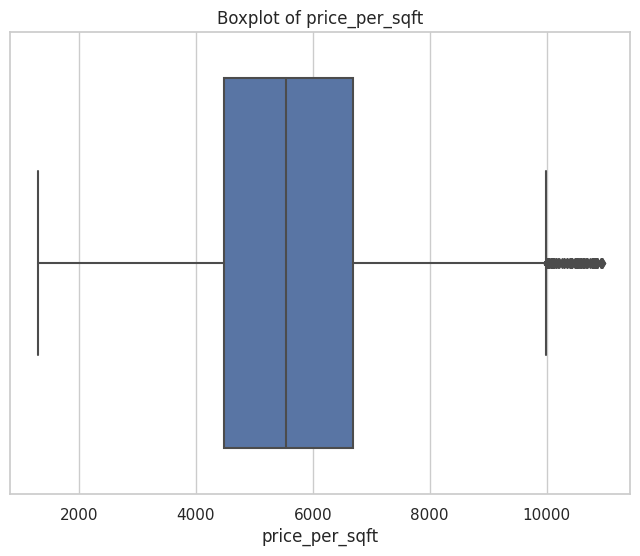

In [ ]:
def plot_boxplot(dataframe, column_name):
    sns.set(style="whitegrid")  # Optional, for styling
    plt.figure(figsize=(8, 6))  # Optional, set the figure size
    sns.boxplot(x=dataframe[column_name])
    plt.xlabel(column_name)
    plt.title(f"Boxplot of {column_name}")
    plt.show()
plot_boxplot(dt6,'price_per_sqft')

**OUTLIER REMOVAL AS PER UNUSUAL NUMBER OF BATHROOMS COMPARED TO BEDROOM**

In [ ]:
dt6.bath.unique()

array([ 3.,  2.,  5.,  4.,  1.,  8.,  7.,  6.,  9., 12., 10., 16., 13.])

It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
dt6[dt6.bath>dt6.bhk+2]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1767,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5856,Built-up Area,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
7578,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
9339,Super built-up Area,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [ ]:
dt7 = dt6[dt6.bath<dt6.bhk+2]
dt7.shape

(7951, 8)

In [ ]:
dt7.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,6000.000000
1,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,10833.333333
2,Super built-up Area,1st Block Jayanagar,1760.0,3.0,2.0,115.0,3,6534.090909
4,Super built-up Area,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,8906.666667
5,Built-up Area,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,5666.666667


In [ ]:
dt8 = dt7.drop(['price_per_sqft'],axis='columns')
dt8.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2
1,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
2,Super built-up Area,1st Block Jayanagar,1760.0,3.0,2.0,115.0,3


In [ ]:
dt8.describe()

,total_sqft,bath,balcony,price,bhk
count,7951.000000,7951.000000,7951.000000,7951.000000,7951.000000
mean,1458.238260,2.384480,1.559426,87.122479,2.467111
std,881.660788,0.920599,0.775382,68.851232,0.905410
min,300.000000,1.000000,0.000000,9.000000,1.000000
25%,1083.000000,2.000000,1.000000,49.000000,2.000000
50%,1250.000000,2.000000,2.000000,70.000000,2.000000
75%,1630.000000,3.000000,2.000000,102.000000,3.000000
max,30400.000000,16.000000,3.000000,2100.000000,16.000000


### EDA

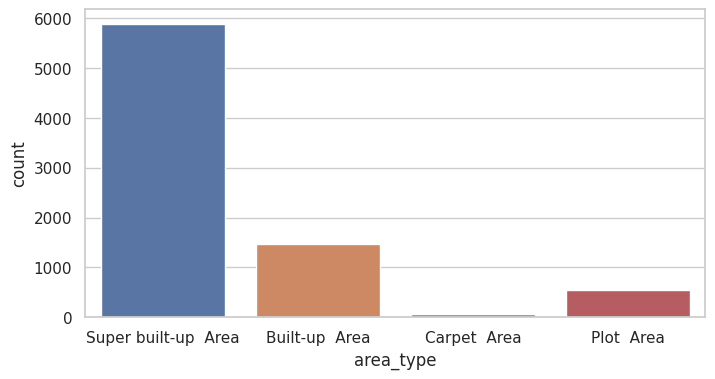

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=dt8,x="area_type")
plt.show()


The majority of the properties are of Super built-up Area type

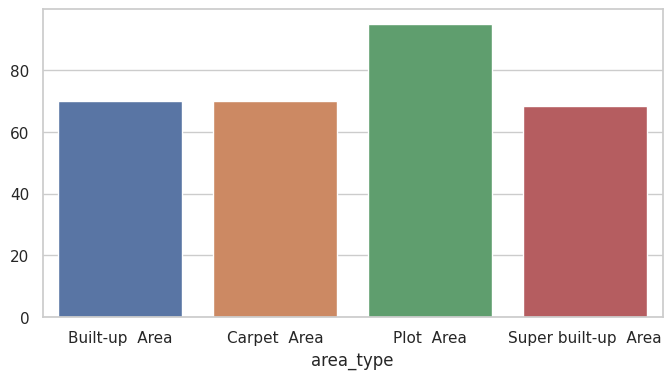

In [ ]:
plt.figure(figsize=(8, 4))
temp = dt8.groupby("area_type")["price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

The average price for Plot Area type properties is more compared to the other categories

In [ ]:
dt8['total_sqft'].describe()

count     7951.000000
mean      1458.238260
std        881.660788
min        300.000000
25%       1083.000000
50%       1250.000000
75%       1630.000000
max      30400.000000
Name: total_sqft, dtype: float64

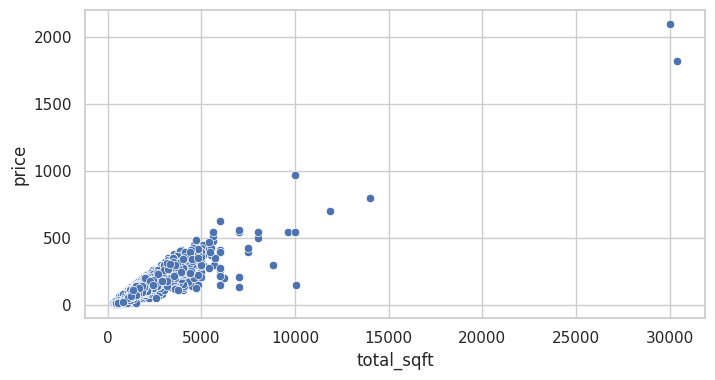

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(x="total_sqft", y="price", data=dt8)
plt.show()

As expected, the price of the property increases with the total area. There are some outliers visible above 40000 sq ft

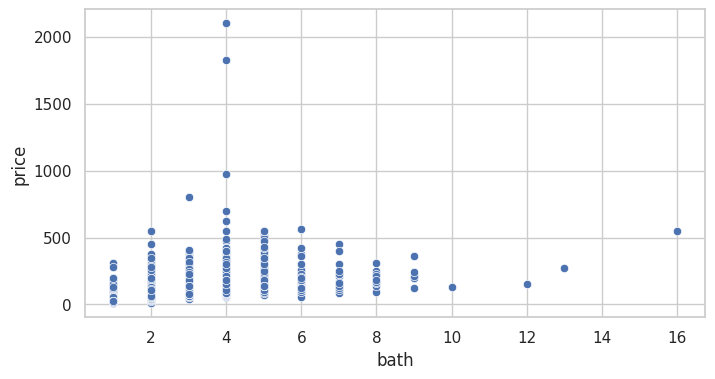

In [ ]:
plt.figure(figsize = (8,4))
sns.scatterplot(x="bath", y="price", data=dt8)
plt.show()

bath column doesn't show any significant direct impact on the price

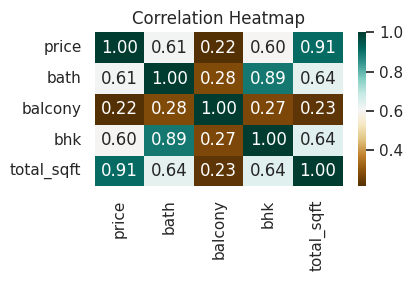

In [ ]:
plt.figure(figsize=(4,2))
columns_of_interest = ["price", "bath", "balcony", "bhk","total_sqft"]
sns.heatmap(dt8[columns_of_interest].corr(), annot=True, cmap="BrBG", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

The heatmap supports the observation that there is minimal correlation between the "price" and "balcony" variables. However, it indicates that "price" exhibits nearly equal and relatively strong correlations with both "bath" and "bhk."

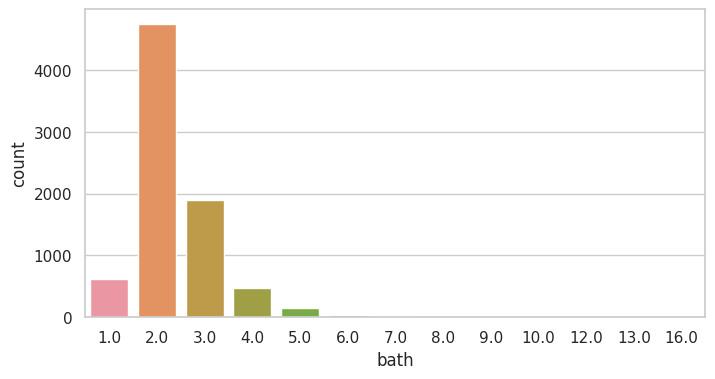

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dt8,x="bath")
plt.show()

Most of the properties have bathrooms less than 8. Also, the number of properties with 2 bathrooms are more compared to others. It indicates that properties with 2 bathrooms are high in demand

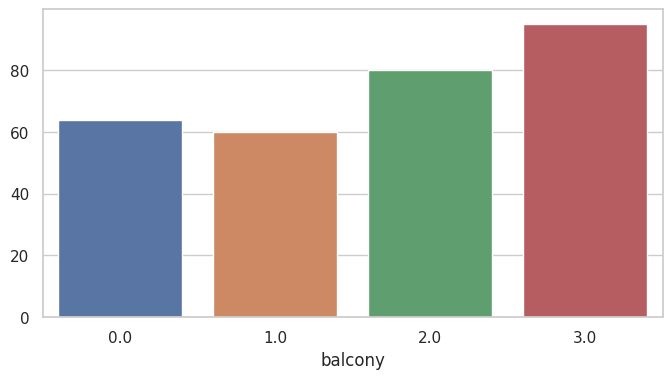

In [ ]:
plt.figure(figsize=(8, 4))
temp = dt8.groupby("balcony")["price"].median()
sns.barplot(x=temp.index, y=temp.values)
plt.show()

The average price of properties with 1 balcony is lower than properties where there are no balconies.
Based on this, we might say that the 1 balcony properties are low in demand i.e., the prices for properties are higher if there is no balcony or has more than 1 balcony.


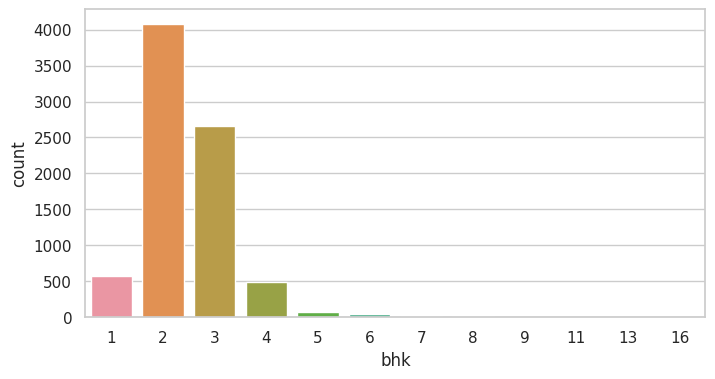

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dt8,x="bhk")
plt.show()

Majority of the records are with 2 bhk and 3 bhk

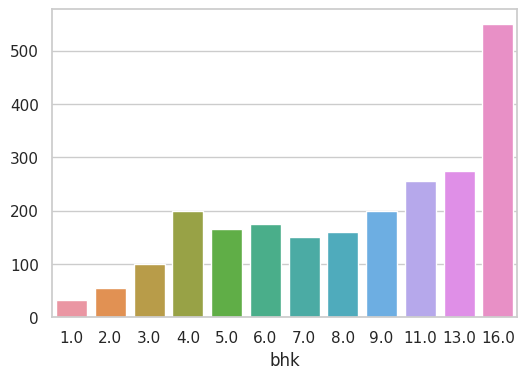

In [ ]:
plt.figure(figsize=(6,4))
temp = dt8.groupby("bhk")["price"].median()
temp.index = temp.index.astype("float")
sns.barplot(x=temp.index, y=temp.values)
plt.show()

The average price increase as the number of rooms increase. But there is some variation when bhk is more than 4.

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns_of_interest = ["bath", "balcony", "bhk", "total_sqft"]

# Select only the columns of interest
data_vif = dt8[columns_of_interest]

# Add a constant to the dataset
data_vif = sm.add_constant(data_vif)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

# Filter out the constant from the results
vif_data = vif_data[vif_data["Variable"] != "const"]

# Print the VIF results
print(vif_data)

     Variable       VIF
1        bath  5.015666
2     balcony  1.092596
3         bhk  5.064352
4  total_sqft  1.776418


In [ ]:
columns_of_interest = ["balcony", "bhk", "total_sqft"]
# Select only the columns of interest
data_vif = dt8[columns_of_interest]

# Add a constant to the dataset
data_vif = sm.add_constant(data_vif)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(data_vif.shape[1])]

# Filter out the constant from the results
vif_data = vif_data[vif_data["Variable"] != "const"]

# Print the VIF results
print(vif_data)

     Variable       VIF
1     balcony  1.087866
2         bhk  1.757689
3  total_sqft  1.717408


**ONE HOT ENCODING**

In [ ]:
dummies = pd.get_dummies(dt8.area_type)
dummies.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1


In [ ]:
dt9 = pd.concat([dt8.drop('area_type',axis='columns'),dummies],axis='columns')
dt9.head()

,location,total_sqft,bath,balcony,price,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,0,0,0,1
1,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0
2,1st Block Jayanagar,1760.0,3.0,2.0,115.0,3,0,0,0,1
4,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,0,0,0,1
5,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,1,0,0,0


In [ ]:
dummies1 = pd.get_dummies(dt9.location)
dummies1.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dt10 = pd.concat([dt9.drop('location',axis='columns'),dummies1.drop('other',axis='columns')],axis='columns')
dt10.head()

,total_sqft,bath,balcony,price,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,2.0,60.0,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,0.0,130.0,3,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1760.0,3.0,2.0,115.0,3,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,1.0,167.0,3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1500.0,5.0,2.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dt10.isnull().sum().sort_values(ascending=False)

total_sqft                  0
Konanakunte                 0
Kothannur                   0
Kothanur                    0
Kudlu                       0
                           ..
Electronic City Phase II    0
Electronics City Phase 1    0
Frazer Town                 0
GM Palaya                   0
Yeshwanthpur                0
Length: 247, dtype: int64

In [ ]:
dt10['price'].isnull().sum()

0

In [ ]:
dt10.shape

(7951, 247)

In [ ]:
dt11 = dt10.drop('bath',axis='columns')
dt11.head()

,total_sqft,balcony,price,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,2.0,60.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,0.0,130.0,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1760.0,2.0,115.0,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,1.0,167.0,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1500.0,2.0,85.0,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**STANDARDIZATION**

**BUILD A MODEL**

In [ ]:
X = dt10.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,3.0,2.0,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,0.0,3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1760.0,3.0,2.0,3,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,1.0,3,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1500.0,5.0,2.0,5,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = dt10.price
y.head()

0     60.0
1    130.0
2    115.0
4    167.0
5     85.0
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
X_train.shape,X_test.shape


((6360, 246), (1591, 246))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)


In [ ]:
X_train_scaled

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0.299303,0.670259,0.567284,0.591322,-0.477035,-0.087204,-0.271959,0.595510,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
1,1.047944,0.670259,0.567284,0.591322,-0.477035,-0.087204,3.677030,-1.679232,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
2,-0.051692,-0.413883,0.567284,0.591322,-0.477035,-0.087204,-0.271959,0.595510,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
3,-0.287170,-0.413883,0.567284,-0.509617,-0.477035,-0.087204,-0.271959,0.595510,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
4,0.381498,1.754402,1.856749,1.692260,-0.477035,-0.087204,3.677030,-1.679232,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,5.438467,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,0.464804,-0.413883,-0.722182,0.591322,-0.477035,-0.087204,3.677030,-1.679232,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
6356,0.214887,0.670259,0.567284,0.591322,-0.477035,-0.087204,-0.271959,0.595510,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
6357,-0.484882,-0.413883,-0.722182,-0.509617,-0.477035,-0.087204,-0.271959,0.595510,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449
6358,-0.342707,-0.413883,-0.722182,-0.509617,2.096283,-0.087204,-0.271959,-1.679232,-0.021724,-0.046969,...,-0.056166,-0.033194,-0.030729,-0.069986,-0.183875,-0.039684,-0.115691,-0.056166,-0.033194,-0.075449


In [ ]:
np.round(X_train.describe(),1)

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,...,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0
mean,1456.5,2.4,1.6,2.5,0.2,0.0,0.1,0.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,900.4,0.9,0.8,0.9,0.4,0.1,0.3,0.4,0.0,0.0,...,0.1,0.0,0.0,0.1,0.2,0.0,0.1,0.1,0.0,0.1
min,300.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1085.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1250.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1614.0,3.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,30400.0,16.0,3.0,16.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
np.round(X_train_scaled.describe(),1)

,total_sqft,bath,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,...,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0,6360.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.3,-1.5,-2.0,-1.6,-0.5,-0.1,-0.3,-1.7,-0.0,-0.0,...,-0.1,-0.0,-0.0,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.1
25%,-0.4,-0.4,-0.7,-0.5,-0.5,-0.1,-0.3,-1.7,-0.0,-0.0,...,-0.1,-0.0,-0.0,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.1
50%,-0.2,-0.4,0.6,-0.5,-0.5,-0.1,-0.3,0.6,-0.0,-0.0,...,-0.1,-0.0,-0.0,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.1
75%,0.2,0.7,0.6,0.6,-0.5,-0.1,-0.3,0.6,-0.0,-0.0,...,-0.1,-0.0,-0.0,-0.1,-0.2,-0.0,-0.1,-0.1,-0.0,-0.1
max,32.1,14.8,1.9,14.9,2.1,11.5,3.7,0.6,46.0,21.3,...,17.8,30.1,32.5,14.3,5.4,25.2,8.6,17.8,30.1,13.3


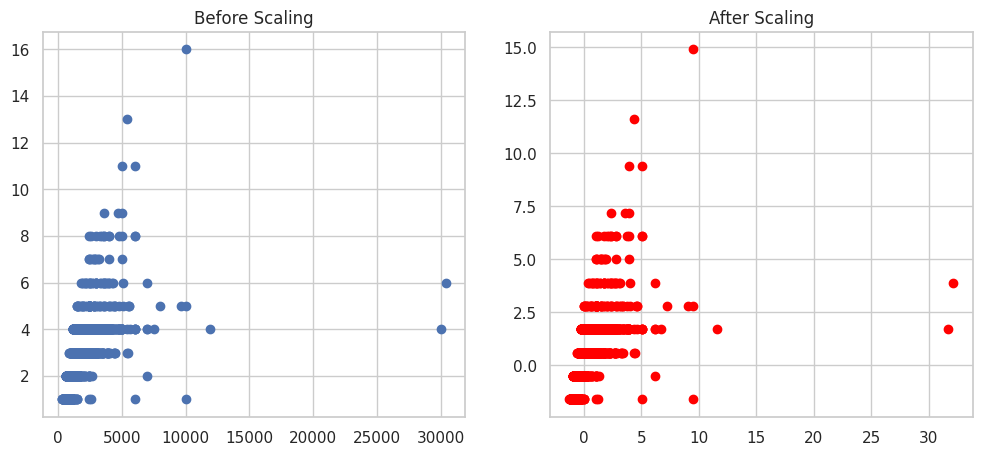

In [ ]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['total_sqft'],X_train['bhk'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['total_sqft'],X_train_scaled['bhk'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [ ]:
import sklearn
import math
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train_scaled,y_train)
lr_clf.score(X_test_scaled,y_test)
lin_preds = lr_clf.predict(X_test_scaled)
lin_mse = sklearn.metrics.mean_squared_error(y_test, lin_preds)
lin_rmse = math.sqrt(lin_mse)
print(lin_rmse)

23.062865283726474


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lin_preds)
print(r2)

0.8629817342397784


In [ ]:
n = len(y_test)
# Number of features (independent variables)
p = X_test_scaled.shape[1]
# Calculate the adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adj_r2)


0.8379024980961665


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85205985, 0.87601645, 0.80721689, 0.92505541, 0.83545869])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1e-3, 1e-2, 0.1, 1, 5]
            }
        },
        'Ridge Regressor': {
            'model': Ridge(),
            'params': {
                'alpha':[1e-3, 1e-2, 0.1, 1, 5,7,10]
               }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,lasso,0.859926,{'alpha': 0.001}
1,Ridge Regressor,0.860403,{'alpha': 1}


Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lr1_clf = Lasso(alpha=0.001)
lr1_clf.fit(X_train,y_train)
lr1_clf.score(X_test,y_test)
lasso_preds = lr1_clf.predict(X_test)
lasso_mse = sklearn.metrics.mean_squared_error(y_test, lasso_preds)
lasso_rmse = math.sqrt(lasso_mse)
print(lasso_rmse)

23.052624195033676


In [ ]:
# Get the feature names
feature_names = X_train.columns

# Get the coefficients of the Lasso model
lasso_coefficients = lr1_clf.coef_

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

# Print the DataFrame
print(coefficients_df)

                Feature  Coefficient
0            total_sqft     0.067129
1                  bath     1.151360
2               balcony     0.539511
3                   bhk     0.418478
4        Built-up  Area    -2.452067
..                  ...          ...
241      Yelachenahalli    -9.529725
242           Yelahanka    -9.275497
243  Yelahanka New Town   -17.280117
244         Yelenahalli   -31.537838
245        Yeshwanthpur    10.181665

[246 rows x 2 columns]


In [ ]:
list1=lr1_clf.coef_.tolist()
print(len(list1))
print(list1)

246
[0.06712877911214717, 1.1513596458056634, 0.5395107289907193, 0.4184777593901192, -2.452067426586639, 5.075761856493704, 7.767836348653365, -0.570779691192015, 14.35107917657485, 28.23683232824103, -27.455550441621792, -28.491908917787327, -35.47677068324095, -23.904261619449922, 11.349161760812004, 5.454541211983636, -24.475836404159146, -19.279191660462036, -15.860369308471245, -29.149151042933294, -19.724504062961632, -8.521770512018227, -2.8140174094925645, -11.115201821907863, -21.3792494587385, -29.058249848152727, -23.786878349837455, -28.07765939106906, -9.109444127247647, -8.786166472961698, -19.64612578342958, -27.07182489066295, -7.1719940090817405, -13.148499821684286, -27.190624836406897, -3.206142050903602, 2.829469917237645, -8.970375638189555, 25.076411839925647, -20.89789615854102, -40.806537734395995, -54.212557181866636, -10.902902301066918, -23.688150404587464, 9.893233084670419, -11.927959246490037, 48.010589568870635, 15.615555858495487, -26.411733348542423, -

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(Lasso(alpha=0.001), X, y, cv=cv)

array([0.8522186 , 0.87888519, 0.80741607, 0.92550363, 0.83560551])

Ridge regression

In [ ]:
lr2_clf = Ridge(alpha=1)
lr2_clf.fit(X_train,y_train)
lr2_clf.score(X_test,y_test)
ridge_preds = lr2_clf.predict(X_test)
ridge_mse = sklearn.metrics.mean_squared_error(y_test, ridge_preds)
ridge_rmse = math.sqrt(ridge_mse)
print(ridge_rmse)

23.040479920406653


In [ ]:
list2=lr2_clf.coef_.tolist()
print(len(list2))
print(list2)

246
[0.06721133005632624, 1.3565065649035353, 0.5542886984384815, 0.23058960975769496, -5.003099441658813, 2.776889648674326, 5.4508918230018795, -3.22468203004035, 13.385105799954246, 28.019483495231423, -24.187049799584805, -20.347950430875134, -29.472943560711624, -21.76850244945941, 12.192797066805019, 6.840114769863481, -22.571211662037147, -17.474959447975873, -13.270572522480858, -26.39472803523119, -18.008397162668892, -7.067938509986, -1.8488747620656674, -9.487397050525194, -19.32020069821018, -26.7093998242238, -21.286041989572706, -24.61953282001032, -7.672770093438228, -7.343352699814919, -17.80748467052152, -23.738444131284233, -5.825021466155308, -11.285757524922088, -24.484429552951795, -2.320398696041673, 4.363751362433846, -7.529012833259937, 23.198936966144437, -18.210622613876644, -35.67382340835779, -46.25785189935969, -9.272478579028867, -20.56752034494214, 10.86594603655035, -10.46297878736876, 46.31322139812529, 15.842747931664864, -23.779548840292385, -26.59350

In [ ]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(Ridge(alpha=1), X, y, cv=cv)

array([0.85235382, 0.87872711, 0.80775552, 0.9278756 , 0.83530501])

After dropping bath

In [ ]:
X = dt11.drop(['price'],axis='columns')
X.head()

,total_sqft,balcony,bhk,Built-up Area,Carpet Area,Plot Area,Super built-up Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1000.0,2.0,2,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,0.0,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1760.0,2.0,3,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,1.0,3,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,1500.0,2.0,5,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = dt11.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_train.columns)

In [ ]:
import sklearn
import math
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train_scaled,y_train)
lr_clf.score(X_test_scaled,y_test)
lin_preds = lr_clf.predict(X_test_scaled)
lin_mse = sklearn.metrics.mean_squared_error(y_test, lin_preds)
lin_rmse = math.sqrt(lin_mse)
print(lin_rmse)

23.21749060229389


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, lin_preds)
print(r2)

0.8611382932529172


In [ ]:
n = len(y_test)
# Number of features (independent variables)
p = X_test_scaled.shape[1]
# Calculate the adjusted R-squared
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(adj_r2)

0.8358437816149729


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85157305, 0.87869395, 0.80844187, 0.9247774 , 0.83507111])